## 实验：BGR 图像轮廓检测

### 实验概要

从这里开始，我们将学习如何从图像中获取感兴趣的对象。我们将从轮廓的介绍开始，然后继续介绍一些有趣的方式来应用此概念。`轮廓`，是对象的边界，它是沿着具有相同颜色或强度的图像部分的闭合形状。就 OpenCV 而言，轮廓是黑色背景上一组白色像素的边界。同时，在 OpenCV 中，只能从二值图像中提取轮廓。

#### 轮廓的基本检测和绘制

使用 OpenCV 只能在二值图像中检测轮廓。要检测彩色 (BGR) 或灰度图像中的轮廓，首先需要将其转换为二进制。

在 OpenCV 中，彩色图像的通道按 BGR（蓝色，绿色和红色）而不是 RGB 的顺序排列。要在彩色图像中找到轮廓，首先，您需要将其转换为灰度。之后，您将对其进行分段以将其转换为二进制文件。可以根据您选择的固定灰度值进行阈值分割，也可以使用 OSTU 算法（大津法 / 最大类间差方法）—— 或其他适合您数据的方法，进行分割。以下是轮廓检测的流程图：

<img src="./img/1.png" width="50%">

检测图像轮廓的命令如下：

```python
contours, hierarchy = cv2.findContours(source_image, retrieval_mode, approx_method)
```
该函数有两个输出 ——

- **`contours`：** 是包含源图像中所有检测到的轮廓的列表。
- **`hierarchy`：** 是一个变量，它告诉您轮廓之间的关系。例如：轮廓是否包含在另一个轮廓内？

在本实验中，我们将仅探索 `contours` 这个输出变量。而上述函数的输入说明如下：

- **`source_image`：** 是您输入的二值图像。要检测轮廓，此二值图像的背景必须为黑色，而轮廓是从白色斑点中提取的。
- **`retrieval_mode`：** 是一个标志，指 `cv2.findContours` 函数如何获取所有轮廓。（是否应该单独获取所有轮廓？如果一个轮廓位于另一个较大的轮廓内，是否应返回该信息？如果许多轮廓位于一个较大的轮廓内，则应返回内部轮廓，还是仅外部轮廓就足够？）
 - 如果只想获取所有最边缘的外部轮廓，使用 `cv2.RETR_EXTERNAL`。这将忽略位于其他轮廓内的所有那些轮廓。
 - 如果您只是想独立地检索所有轮廓并且不关心某一个轮廓，使用 `cv2.RETR_LIST` 。这不会创建父子关系，因此所有轮廓都处于同一层次级别。
 - 如果您有兴趣查找对象的外部和内部边界（仅两个级别：外部形状的边界和内部孔的边界），则可以使用 `cv2.RETR_CCOMP`。
 - 如果要制作涵盖轮廓整个家族（父代，子代，孙代和曾孙代）的详细族谱，则需要将此输入设置为 `cv2.RETR_TREE`。
- **`approx_method`：** 是一个标志，告诉该函数如何存储检测到的轮廓的边界点。
 - 是否应保存每个坐标点？如果是，使用 `cv2.CHAIN_APPROX_NONE`。
 - 或者仅应保存那些必须绘制轮廓的点？在这种情况下，使用 `cv2.CHAIN_APPROX_SIMPLE`。这将可以节省很多内存。

更详细的完整说明，[请参考官方文档](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_contours/py_contours_begin/py_contours_begin.html)。

现在，假设您有一个轮廓图像，如以下截图所示，并且需要检测其轮廓：

<img src="./img/2.jfif" width="50%">

我们可以将前面的图像存储在 `img` 变量中。然后，要检测轮廓，可以应用 `cv2.findContours` 命令。这里我们简单的使用外部轮廓检测和 `CHAIN_APPROX_NONE` 方法：

```python
contours, hierarchy = cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
```

要将检测到的轮廓绘制在 BGR 图像上，完整的命令格式如下：

```python
marked_img = cv2.drawContours(img, contours, contourIdx, color, 
                              thickness, lineType = cv.LINE_8, 
                              hierarchy = new cv.Mat(),
                              maxLevel = INT_MAX,
                              offset = new cv.Point(0, 0))
```
该函数的输出是图像 img 以及在图像上绘制的轮廓。下面是这个函数输入的简要说明:

- **`img`：** 你想要标记轮廓的图像的 BGR 版本。它应该是 BGR，因为你需要用一些颜色来绘制轮廓，而不是黑色或白色，颜色将在 BGR 代码中有三个值。因此，在图像中需要三个通道。
- **`contours`：** 检测到的轮廓的 Python 列表。。
- **`contourIdx`：** 是要从轮廓列表中绘制的轮廓。如果要全部绘制，则其输入值为 `-1`。
- **`color`：** 是要用于绘图 BGR 颜色代码。例如：红色就是（0,0,255）。要查看某些常用颜色的RGB颜色代码，请访问[这个文档](https://www.rapidtables.com/web/color/RGB_Color.html)。要将这些 RGB 颜色代码转换为 BGR，只需颠倒这三个值的顺序即可。
- **`thickness`：** 是用于绘制轮廓的线的粗细，这是可选输入。如果将其指定为负，则绘制的轮廓将填充颜色。
- **`lineType`：** 是一个可选参数，用于指定线路连接性。更详细的完整说明，[请参考官方文档](https://docs.opencv.org/master/d6/d6e/group__imgproc__draw.html#gaf076ef45de481ac96e0ab3dc2c29a777)。
- **`hierarchy`：** 是一个可选输入，其中包含有关当前层次结构级别的信息，因此，如果要绘制到特定的层次结构级别，可以在下一个输入中指定该层次结构。
- **`maxLevel`：** 对应于您要绘制的层次结构的深度级别。 如果 `maxLevel` 为 `0`，则仅绘制外部轮廓。 如果为 `1`，则将绘制所有轮廓及其嵌套的（直到第 `1` 级）轮廓。如果为 `2` ，则将绘制所有轮廓，其嵌套轮廓以及从嵌套到嵌套的轮廓（最高 `2` 级）。
- **`offset`：** 是可选的轮廓偏移参数。

将此命令应用于前面的示例，让我们使用红色（BGR 代码：0, 0, 255）和 2 的粗细：

```python
with_contours = cv2.drawContours(im_3chan, contours,-1,(0,0,255),2)
```

在这里，`im_3chan` 是要在其上绘制轮廓的图像的 BGR 版本。当我们输出图像，将看到以下内容：

<img src="./img/3.jfif" width="50%">

在接下来的实验中，我们将看到如何检测彩色图像中的轮廓。

### 实验目标

假设您有以下具有不同形状的彩色图像：

<img src="./img/4.jfif" >

您的任务是计算所有形状并检测它们的外部边界，如下所示：

<img src="./img/5.jfif" width="50%">

### 1. 导入依赖库

In [1]:
import cv2                        # 导入OpenCV
import matplotlib.pyplot as plt   # 导入matplotlib

# 魔法指令，使图像直接在Notebook中显示
%matplotlib inline

### 2. 加载并显示图像

显示图像，一般而言可以使用 `cv2.imshow` 命令，如以下代码所示。 

```python
cv2.imshow( 'gray' , gray_image ) 
cv2.waitKey(0) 
cv2.destroyAllWindows()
```
**由于该代码需要调用本地系统窗口，仅可以应用于本地 OpenCV 执行环境，无法在我们当前的服务器端远程环境上，因此此前一直没有详细讲解。**

以下为这段代码的详细解析，以供您在本地执行实验时参考：

```python
cv2.imshow( 'gray' , gray_image ) 
```

第一个输入，是我们要为其图像加上标题的文本标签，这里是 `gray`。 下一个输入，是我们要显示图像所存储的变量名称：这里是 `gray_image`。此时，系统将显示存储在 `gray_image` 变量中的图像，其中 `gray`作为标题。但是，显示图像后，所有后续代码步骤都将停滞不前，直到您指示代码下一步该做什么：即程序关闭图像窗口并继续运行之前，要等待多长时间？因此，我们需要添加代码，使图像窗口等到用户按下键盘上的任何键再继续，我们可以使用以下命令：

```python
cv2.waitKey(0)
```
如果要在关闭窗口之前等待固定的时间长度，而不必等待用户输入，则可以使用 `cv2.waitKey(time_ms)` 命令，其中 `time_ms` 是希望程序在自动关闭窗口之前等待的毫秒数。上面设置为 `0`，我们的程序将等待用户按下键盘上的任意键，一旦用户按下它，程序执行将继续程序运行。因此，我们需要给它下一条指令 —— 关闭所有打开的窗口。

```python
cv2.destroyAllWindows()
```

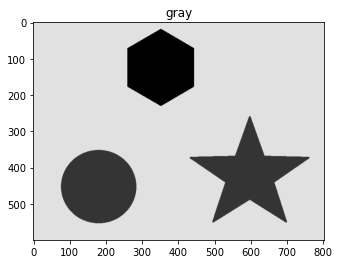

In [3]:
# 设置输入输出路径
import os
base_path = os.environ.get("BASE_PATH",'../data/')
data_path = os.path.join(base_path + "lab4/")
result_path = "result/"
os.makedirs(result_path, exist_ok=True)

# 读取图像文件
image = cv2.imread('./data/sample shapes.png')          
# 将图像转换为灰度
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)    

# 在云实验环境下忽略以下代码，避免程序尝试打开系统窗口显示图片；
# 使用matplotlib替换，使图像直接在 Jupyter Notebook 中输出。

# cv2.imshow( 'gray' , gray_image ) 
# cv2.waitKey(0) 
# cv2.destroyAllWindows()

plt.imshow(gray_image,cmap="gray") # 使用matplotlib将图像喷绘成灰色
plt.title('gray')                  # 指定输出图像的标题
plt.show()                         # 显示图像

### 3. 图像二值化

将图像转换为二值图像。使用 `Otsu` 算法进行分割。如果 `Otsu` 的方法在您的图像上效果不佳，那么您可以选择固定的阈值实现（参考实验：图像二值化）。

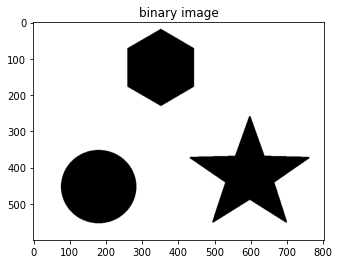

In [4]:
ret,binary_im = cv2.threshold(gray_image,0,255,cv2.THRESH_OTSU) 

# 在云实验环境下忽略以下代码，避免程序尝试打开系统窗口显示图片；
# 使用matplotlib替换，使图像直接在 Jupyter Notebook 中输出。

# cv2.imshow( 'binary image' , binary_im )
# cv2.waitKey(0) 
# cv2.destroyAllWindows()

plt.imshow(binary_im,cmap="gray")     # 使用matplotlib将图像喷绘成灰色
plt.title('binary image')             # 指定输出图像的标题
plt.show()                            # 显示图像

### 4. 图像反转

在将轮廓检测应用于此图像之前，先分析一下要检测的对象。我们要检测在白色背景上的这些黑色形状。此处应用 OpenCV 的轮廓检测实现，首先需要将背景设为黑色，将前景（将要勾画轮廓的图形）设为白色。 这称为反转图像。

在彩色图像中，黑色由 `0` 表示，白色由 `255` 表示。因此，要对其进行反转，我们将简单地应用以下公式：

`pixel = 255–pixel`

这将应用于整个图像，即： `image = 255–image`

在 Python 中，OpenCV 图像存储为 NumPy 数组。 因此，我们可以简单地将使用反转运算符 `~` 其反转实现为：

**`image =~image`**

这两个命令将输出相同的结果。

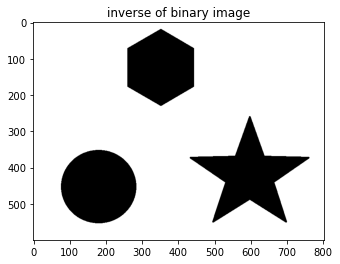

In [7]:
# 通过反转图像运算符 ~ 快速实现前后景黑白颜色的反转
inverted_binary_im= ~binary_im       
# binary_im = 255 - binary_im

# 在云实验环境下忽略以下代码，避免程序尝试打开系统窗口显示图片；
# 使用matplotlib替换，使图像直接在 Jupyter Notebook 中输出。

# cv2.imshow( 'inverse of binary image' , inverted_binary_im )
# cv2.waitKey(0) 
# cv2.destroyAllWindows()

# 使用matplotlib将图像喷绘成灰色
plt.imshow(inverted_binary_im,cmap="gray")      
# 指定输出图像的标题
plt.title('inverse of binary image')            
# 显示图像
plt.show()                                      

### 5. 轮廓检测

使用 `cv2.findContours` 进行轮廓检测：

- 使用 `cv2.RETR_TREE` 参数 —— 涵盖轮廓整个家族；
- 使用 `cv2.CHAIN_APPROX_SIMPLE` 参数 —— 仅保存那些必须绘制轮廓点的坐标，节省内存。

In [12]:
# 执行轮廓检测，涵盖轮廓整个家族
# 同时，仅保存那些必须绘制轮廓点的坐标，节省内存
# inverted_binary_im 为灰度化后的图像 
contours_1,hierarchy_1 = cv2.findContours(inverted_binary_im,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE) # 提取全部树特征
contours_2,hierarchy_2 = cv2.findContours(inverted_binary_im,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE) # 提取外部特征
contours_3,hierarchy_3 = cv2.findContours(inverted_binary_im,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE) # 平等提取特征
contours_4,hierarchy_4 = cv2.findContours(inverted_binary_im,cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE) # 提取内外部边界 

### 6. 轮廓绘制

使用 `cv2.drawContours` 命令，在原始 BGR 图像上标记所有检测到的轮廓，用 `绿色（0,255,0）` 绘制，将厚度设置为 `3`:

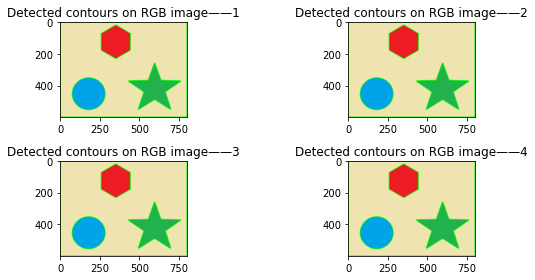

In [26]:
# image 为原始图像 
# conyours 为抽取出的边缘集合 
# -1 表示全部渲染 
# （0，255，0） 表示颜色
# 3 表示线条粗细
with_contours_1 = cv2.drawContours(image, contours_1, -1,(0,255,0),3)
with_contours_2 = cv2.drawContours(image, contours_2, -1,(0,255,25),3) 
with_contours_3 = cv2.drawContours(image, contours_3, -1,(0,255,),3) 
with_contours_4 = cv2.drawContours(image, contours_4, -1,(0,255,0),3) 


# 在云实验环境下忽略以下代码，避免程序尝试打开系统窗口显示图片；
# 使用matplotlib替换，使图像直接在 Jupyter Notebook 中输出。

# cv2.imshow( 'Detected contours on RGB image' , with_contours )
# cv2.waitKey(0) 
# cv2.destroyAllWindows()

# 画布大小
fig = plt.figure(figsize=(11,4))


plt.subplot(2, 2, 1)
# 使用matplotlib将图像转换为RGB
plt.imshow(with_contours_1[:,:,::-1])          
# 指定输出图像的标题
plt.title('Detected contours on RGB image——1')  
# 显示图像
plt.tight_layout()

plt.subplot(2, 2, 2)
plt.imshow(with_contours_2[:,:,::-1])          
# 指定输出图像的标题
plt.title('Detected contours on RGB image——2')  
# 显示图像
plt.tight_layout()

plt.subplot(2, 2, 3)
plt.imshow(with_contours_3[:,:,::-1])          
# 指定输出图像的标题
plt.title('Detected contours on RGB image——3')  
# 显示图像


plt.subplot(2, 2, 4)
plt.imshow(with_contours_4[:,:,::-1])          
# 指定输出图像的标题
plt.title('Detected contours on RGB image——4')  
# 显示图像
plt.tight_layout()

plt.show()                                   

### 7. 统计轮廓数量

最后，显示检测到的轮廓的总数。

In [27]:
# 设置输出提示
print('Total number of detected contours is:')  
# 显示检测到的轮廓的总数
print(len(contours_1))                            

Total number of detected contours is:
4


### 实验小结：

在本实验中，我们练习了如何检测彩色图像上的轮廓。

首先，必须将图像转换为灰度，然后反转为具有黑色背景和白色前景（将要勾画轮廓的图形）的二值图像。

之后，使用 OpenCV 函数 `cv2.findContours` 检测轮廓，并使用 `cv2.drawContours` 将其绘制在 BGR 图像上。

同时，通过 matplotlib 将图像转换为 RGB 在 Jupyter Notebook 中显示。

最后，统计并输出当前检测出来的所有轮廓数量。